In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## EDA

In [39]:
df = pd.read_csv('dataset.csv', index_col=0)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10320 non-null  object
 1   value      10320 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 241.9+ KB


In [41]:
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [42]:
# Converting to a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [43]:
# Setting a datetime index to the dataframe
df = df.set_index('timestamp')

In [44]:
df.head()

,value
timestamp,
2014-07-01 00:00:00,10844
2014-07-01 00:30:00,8127
2014-07-01 01:00:00,6210
2014-07-01 01:30:00,4656
2014-07-01 02:00:00,3820


In [45]:
# Checking NULL values
df.isna().sum()

value    0
dtype: int64

No null values present in our data 

#### Visualizing the data

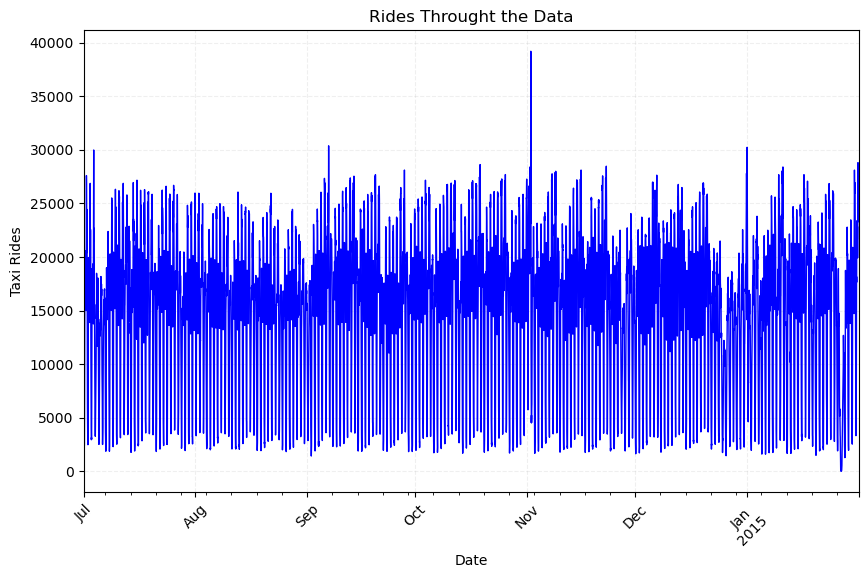

In [46]:
df['value'].plot(figsize=(10, 6), color='blue', linewidth=1)


plt.xlabel('Date')
plt.ylabel('Taxi Rides')
plt.title('Rides Throught the Data')


plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.2)

plt.show()


Let's see about the peak we get

In [47]:
df[df['value'] > 35000]

,value
timestamp,
2014-11-02 01:00:00,39197
2014-11-02 01:30:00,35212


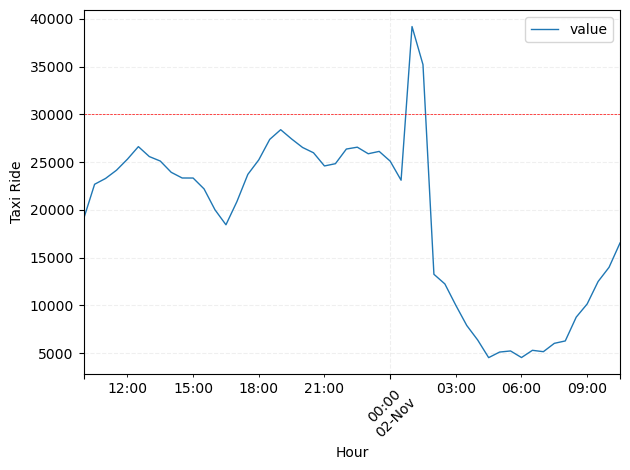

In [64]:
# Taking a closure look at the data

df.loc['2014-11-01 10:00:00':,].head(50).plot(linewidth = 1)

plt.xlabel('Hour')
plt.ylabel('Taxi Ride')
plt.xticks(rotation = 45)
plt.axhline(y = 30000, color = 'red', linestyle = '--', linewidth = 0.5)
plt.tight_layout()
plt.grid(linestyle = '--', alpha = 0.2)
plt.show()

We see something happened on 2 nov 2014 at 1am since there is a high volumne of rides during that hour

In [65]:
# Capping these outlier to 20000
df[df['value'] > 35000] = 20000

Let's add other time attributes to better visualize the data

In [69]:
df['day'] = df.index.day
df['hour'] = df.index.hour
df['weekday'] = df.index.weekday
df

,value,day,hour,weekday
timestamp,,,,
2014-07-01 00:00:00,10844,1,0,1
2014-07-01 00:30:00,8127,1,0,1
2014-07-01 01:00:00,6210,1,1,1
2014-07-01 01:30:00,4656,1,1,1
2014-07-01 02:00:00,3820,1,2,1
...,...,...,...,...
2015-01-31 21:30:00,24670,31,21,5
2015-01-31 22:00:00,25721,31,22,5
2015-01-31 22:30:00,27309,31,22,5


Lets resample to downsample our data to number days and plot

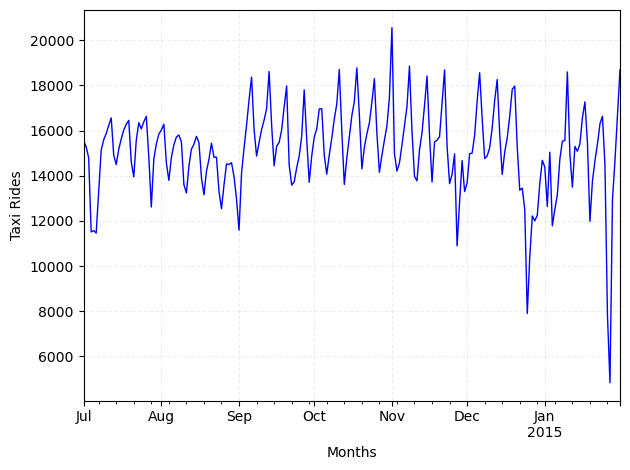

In [74]:
df_day = df['value'].resample('D').mean()
df_day.plot(linewidth = 1, color = 'blue')
plt.xlabel("Months")
plt.ylabel("Taxi Rides")
plt.tight_layout()
plt.grid(linestyle = '--', alpha = 0.2)
plt.show()

The data displays a seasonal pattern, with two evident changepoints.
1. The first changepoint occurs in early September
2. The second occurs at the end of December.

The seasonal trend suggests an increase in taxi rides after August, potentially due to the winter season, while higher variance in January may be influenced by daily weather conditions.

Lets see Data across each month and day

In [ ]:
df_grouped = df.groupby(['month', 'day'])['value'].median()


df_pivot = df_grouped.unstack(level='month')

# Plot each month in one plot
df_pivot.plot(figsize=(12, 6))

# Set the x-axis label and title
plt.xlabel('Day of the Month')
plt.ylabel('Mean Value')
plt.title('Mean Value by Day of the Month - Each Month')

# Show the legend
plt.legend(title='Month')

# Display the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
df['hour'] = df.index.hour
df['month'] = df.index.month

# Group by month and hour, and calculate the mean of the 'value' column
df_grouped = df.groupby(['month', 'hour'])['value'].mean()

# Reshape the data to have month as columns and hour as rows
df_pivot = df_grouped.unstack(level='month')

# Plot each month in one plot
df_pivot.plot(figsize=(12, 6))

# Set the x-axis label and title
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Value')
plt.title('Mean Value by Hour of the Day - Each Month')

# Show the legend
plt.legend(title='Month')

# Display the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
df['hour'] = df.index.hour
df['weekday'] = df.index.weekday

# Group by weekday and hour, and calculate the median of the 'value' column
df_grouped = df.groupby(['weekday', 'hour'])['value'].median()

# Reshape the data to have weekday as columns and hour as rows
df_pivot = df_grouped.unstack(level='weekday')

# Define the weekday names
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot each weekday in one plot
df_pivot.plot(figsize=(12, 6))

# Set the x-axis label and title
plt.xlabel('Hour of the Day')
plt.ylabel('Median Value')
plt.title('Median Value by Hour of the Day - Each Weekday')

# Show the legend
plt.legend(title='Weekday', labels=weekday_names, loc='upper left')

# Display the plot
plt.show()
